# Project: Investigate a Dataset:
[No-show appointments]
>Deep insight into No-Shows for Medical Appointments in Brazil considering some factors that might affect the decision of the patients.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset collects information
from 100k medical appointments in
Brazil


### Questions for Analysis
1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

2. Is there a direct relation between any of the factors to showing?

3. which Neighbourhood should be our targeted location?

4. what is the age segment to focus on ?

5. how is the relation between showing up and the gender ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshow.csv')

In [3]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# Figure out how many registered patients
df.shape

(110527, 14)

In [6]:
#Finding duplicates
sum(df.duplicated())

0

In [7]:
#inspect data types and if there are any missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
#Finding out why the max value of "Handicap is greater than 1"
h_handicap=df.query('Handcap>1')
h_handicap.count()

PatientId         199
AppointmentID     199
Gender            199
ScheduledDay      199
AppointmentDay    199
Age               199
Neighbourhood     199
Scholarship       199
Hipertension      199
Diabetes          199
Alcoholism        199
Handcap           199
SMS_received      199
No-show           199
dtype: int64

**Result**:
* No missing values nor duplications 
* The minimum age is (-1)!
* There are 199 patients with Handicap values greater than 1, without explanation. 


### Data Cleaning
 

In [10]:
#Drop the columns which are not involved in the investigation "PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay".
df.drop(df.columns[[0,1,3,4]], axis=1, inplace=True)

In [11]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
#Renaming columns that has typos and not in a proper shape 
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [14]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
#Finding negative values in Age
negative_age=df.query('Age==-1')
negative_age

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
#Drop the row with the negative age value 
df.drop(index = 99832, inplace = True)

In [17]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
#I noticed the minimum for age is 0, so let's explore how many patients with the age Zero
zero_age=df.query('Age==0')
zero_age.count()

Gender           3539
Age              3539
Neighbourhood    3539
Scholarship      3539
Hypertension     3539
Diabetes         3539
Alcoholism       3539
Handicap         3539
SMS_received     3539
No_show          3539
dtype: int64

In [19]:
df['Age']=df['Age'].replace(0,df['Age'].mean())

In [20]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,38.276801,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,22.104660,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.089219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [21]:
#Replace the values in handicap column which are greater than "1"
df['Handicap'].replace([2,3,4],[1,1,1],inplace = True)

In [22]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [23]:
#Assigning new values to the columns of No_show to make it more easy for visualization
df['No_show'].replace(['No','Yes'],['show','no show'],inplace = True)

In [24]:
df.head(10)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62.0,JARDIM DA PENHA,0,1,0,0,0,0,show
1,M,56.0,JARDIM DA PENHA,0,0,0,0,0,0,show
2,F,62.0,MATA DA PRAIA,0,0,0,0,0,0,show
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,show
4,F,56.0,JARDIM DA PENHA,0,1,1,0,0,0,show
5,F,76.0,REPÚBLICA,0,1,0,0,0,0,show
6,F,23.0,GOIABEIRAS,0,0,0,0,0,0,no show
7,F,39.0,GOIABEIRAS,0,0,0,0,0,0,no show
8,F,21.0,ANDORINHAS,0,0,0,0,0,0,show
9,F,19.0,CONQUISTA,0,0,0,0,0,0,show


<a id='eda'></a>
## Exploratory Data Analysis



### Data general overview

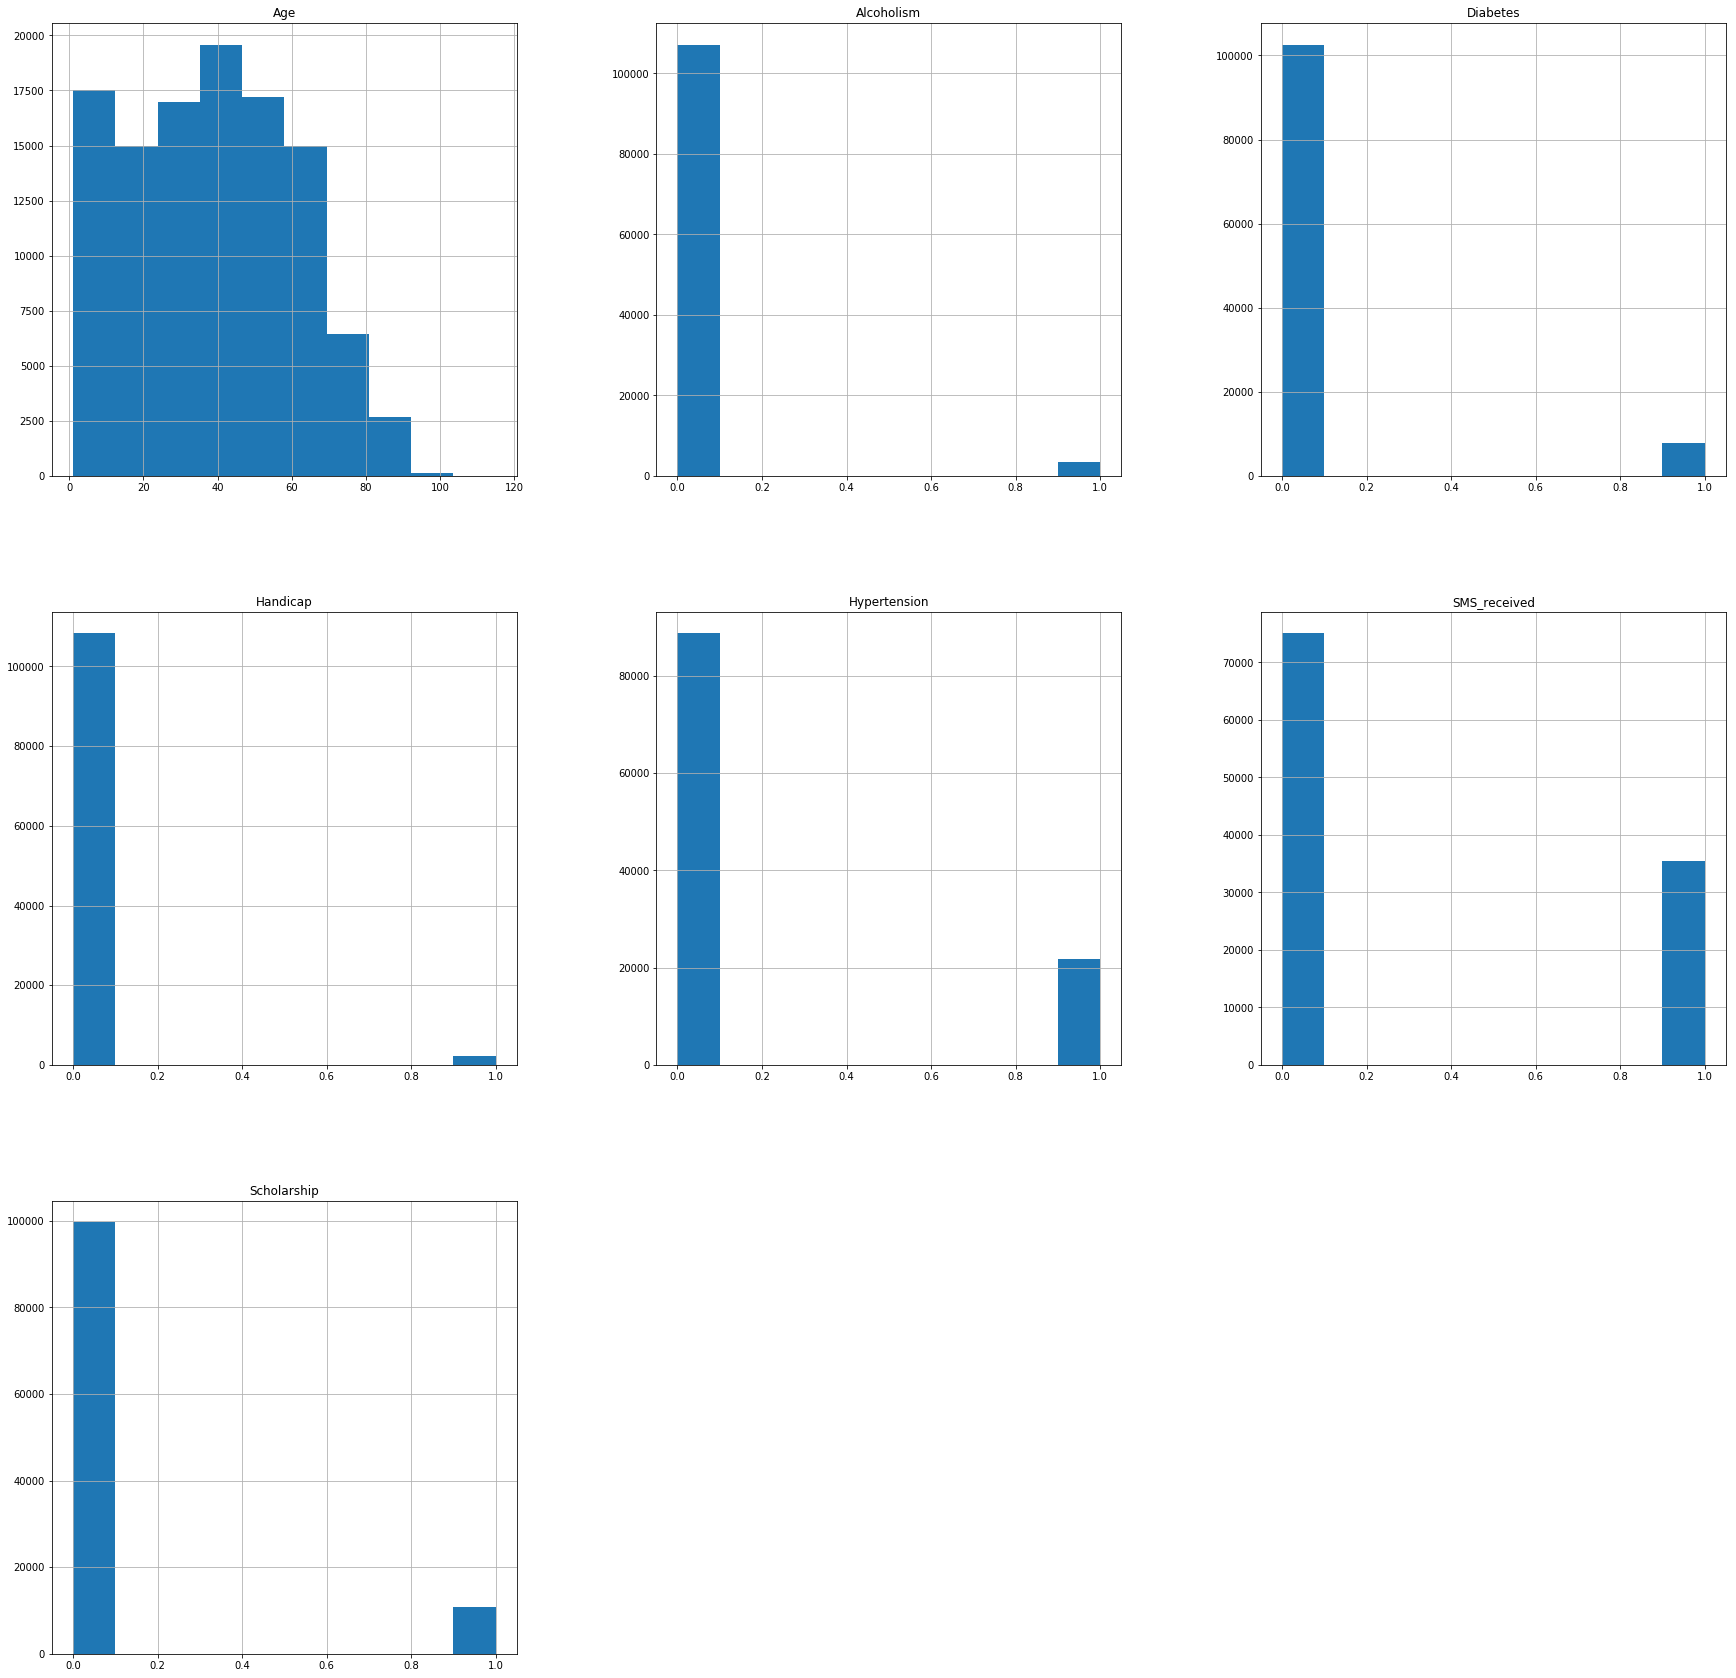

In [25]:
df.hist(figsize=(30,30));

In [26]:
#Grouping the patients according Show/No show factor
show=df.No_show=='show'
noshow=df.No_show=='no show'

In [27]:
df[show].count(), df[noshow].count()

(Gender           88207
 Age              88207
 Neighbourhood    88207
 Scholarship      88207
 Hypertension     88207
 Diabetes         88207
 Alcoholism       88207
 Handicap         88207
 SMS_received     88207
 No_show          88207
 dtype: int64, Gender           22319
 Age              22319
 Neighbourhood    22319
 Scholarship      22319
 Hypertension     22319
 Diabetes         22319
 Alcoholism       22319
 Handicap         22319
 SMS_received     22319
 No_show          22319
 dtype: int64)

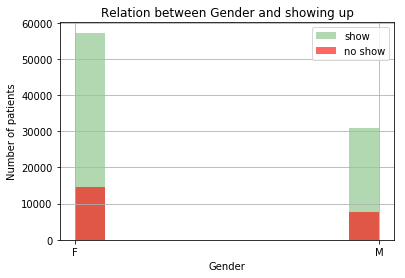

In [28]:
#Detect the relation bewteen Gender and showing up
def showup(df):
    df.Gender[show].hist(color='green', alpha=.3, label='show')
    df.Gender[noshow].hist(color='red', alpha=.6, label='no show')
    plt.legend()
    plt.title('Relation between Gender and showing up')
    plt.xlabel('Gender')
    plt.ylabel('Number of patients');
showup(df)

*No direct relation between Gender and showin up, Taking in consideration that the female patients number is greater than male*

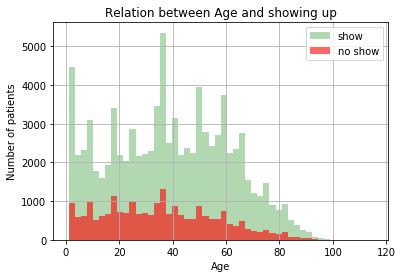

In [29]:
#Detect the relation bewteen Age and showing up

df.Age[show].hist(bins=50, color='green', alpha=.3, label='show')
df.Age[noshow].hist(bins=50, color='red', alpha=.6, label='no show')
plt.legend()
plt.title('Relation between Age and showing up')
plt.xlabel('Age')
plt.ylabel('Number of patients');

*There is kind of relation bewtween showing up and the age; As we can see the kid's parents are more keen to show up on their appointments as well as the segment of 35 to 38 years old*

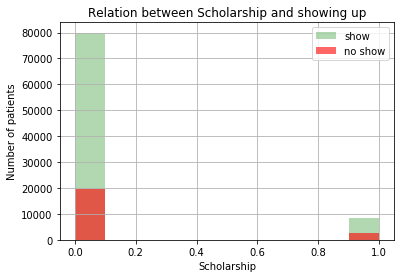

In [30]:
#Detect the relation bewteen Scholarship and showing up

df.Scholarship[show].hist(color='green', alpha=.3, label='show')
df.Scholarship[noshow].hist(color='red', alpha=.6, label='no show')
plt.legend()
plt.title('Relation between Scholarship and showing up')
plt.xlabel('Scholarship')
plt.ylabel('Number of patients');

*Looking at the relation between Scholarship and showing up we can notice a slight affect of having a scholarship on showing up in the hospital*

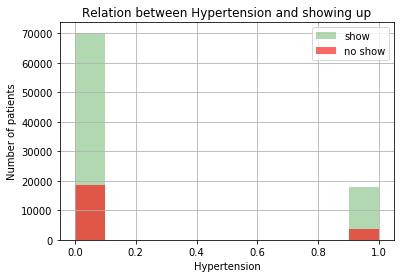

In [31]:
#Detect the relation bewteen Hypertension and showing up

df.Hypertension[show].hist(color='green', alpha=.3, label='show')
df.Hypertension[noshow].hist(color='red', alpha=.6, label='no show')
plt.legend()
plt.title('Relation between Hypertension and showing up')
plt.xlabel('Hypertension')
plt.ylabel('Number of patients');

*No noticable corelation to mention*

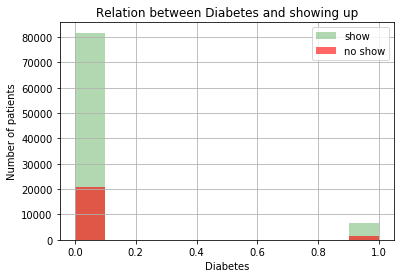

In [32]:
#Detect the relation bewteen Diabetes and showing up

df.Diabetes[show].hist(color='green', alpha=.3, label='show')
df.Diabetes[noshow].hist(color='red', alpha=.6, label='no show')
plt.legend()
plt.title('Relation between Diabetes and showing up')
plt.xlabel('Diabetes')
plt.ylabel('Number of patients');

*No noticable corelation to mention*

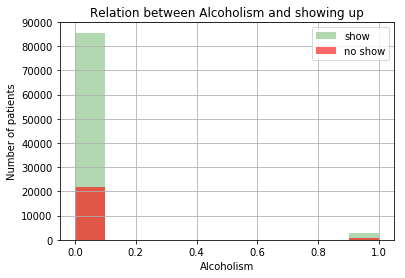

In [33]:
#Detect the relation bewteen Alcoholism and showing up

df.Alcoholism[show].hist(color='green', alpha=.3, label='show')
df.Alcoholism[noshow].hist(color='red', alpha=.6, label='no show')
plt.legend()
plt.title('Relation between Alcoholism and showing up')
plt.xlabel('Alcoholism')
plt.ylabel('Number of patients');

*No noticable corelation to mention*

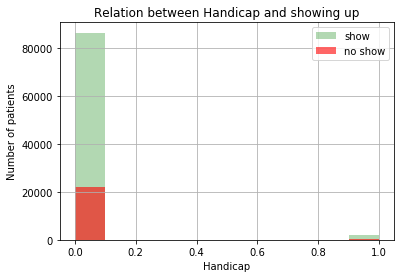

In [34]:
#Detect the relation bewteen Handicap and showing up

df.Handicap[show].hist(color='green', alpha=.3, label='show')
df.Handicap[noshow].hist(color='red', alpha=.6, label='no show')
plt.legend()
plt.title('Relation between Handicap and showing up')
plt.xlabel('Handicap')
plt.ylabel('Number of patients');

*No noticable corelation to mention*

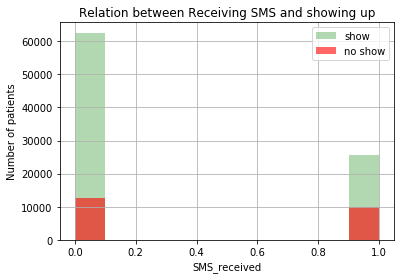

In [35]:
#Detect the relation bewteen Receiving SMS and showing up

df.SMS_received[show].hist(color='green', alpha=.3,label='show')
df.SMS_received[noshow].hist(color='red', alpha=.6, label='no show')
plt.legend()
plt.title('Relation between Receiving SMS and showing up')
plt.xlabel('SMS_received')
plt.ylabel('Number of patients');

*No noticable corelation to mention although I can say the majority did not receive SMS and it does not affect the attendance*

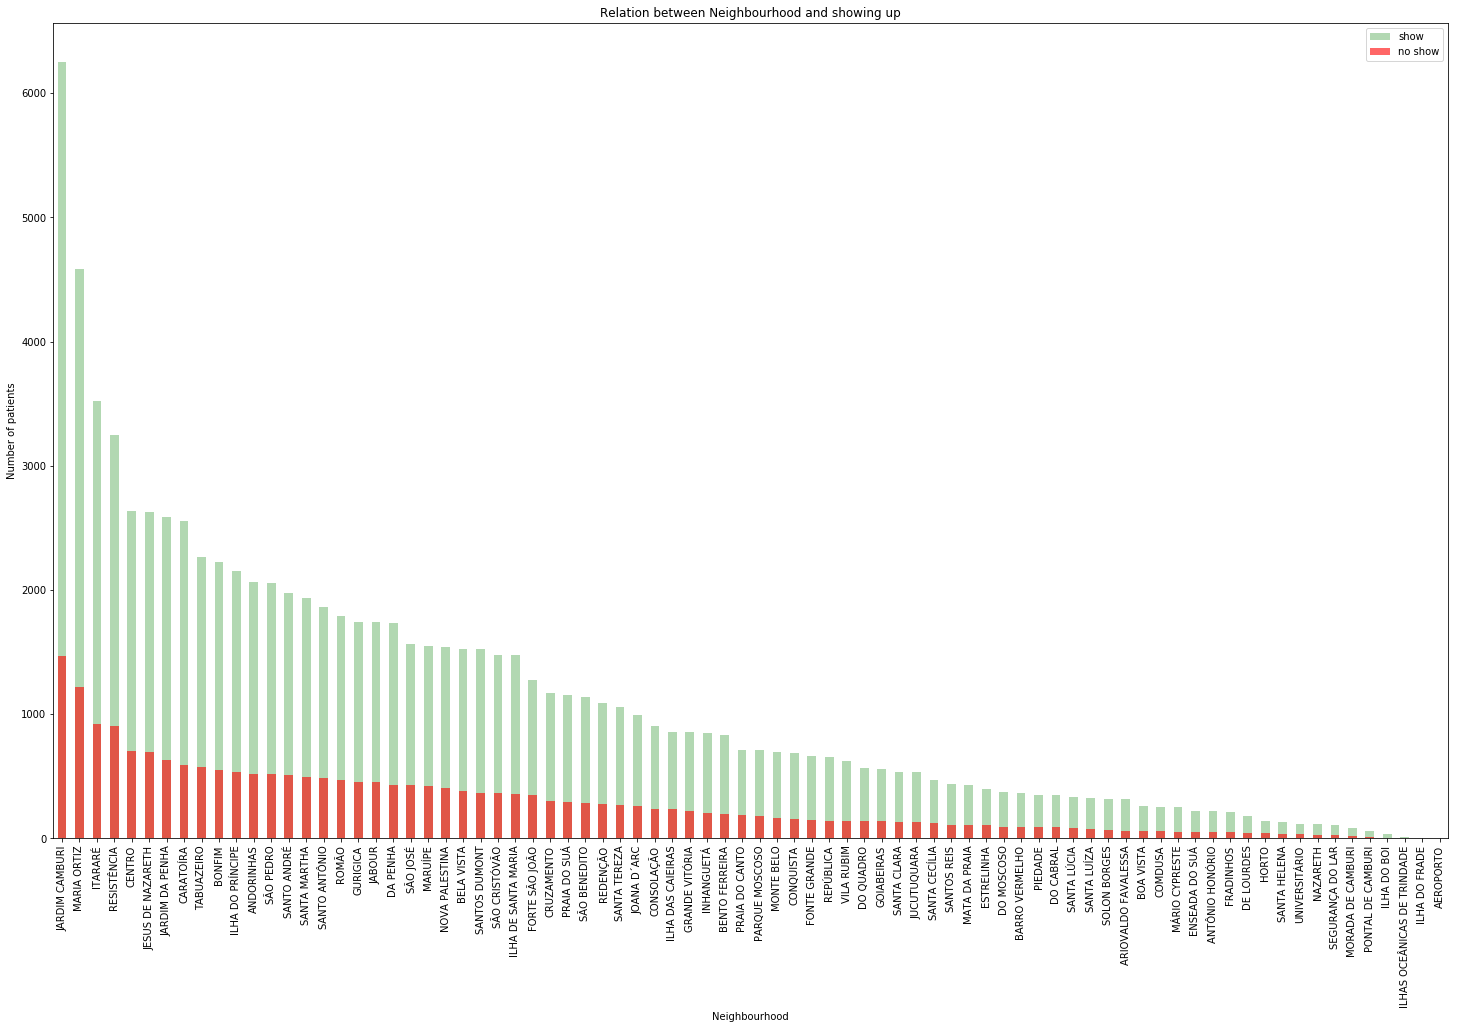

In [36]:
#Detect the relation bewteen Neighbourhood and showing up

plt.figure(figsize=[25,15])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='green', alpha=.3,label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar', color='red', alpha=.6, label='no show')
plt.legend()
plt.title('Relation between Neighbourhood and showing up')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patients');

*There is a strog coorelation between the Neighbourhood and showing up*

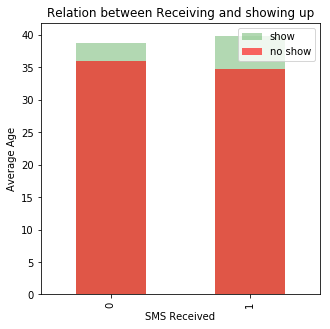

In [37]:
#The relation between Age and receiving SMS and if it has a strong coorelartion to showing up
plt.figure(figsize=[5,5])
df[show].groupby('SMS_received').Age.mean().plot(kind='bar',color='green', alpha=.3,label='show')
df[noshow].groupby('SMS_received').Age.mean().plot(kind='bar', color='red', alpha=.6, label='no show')
plt.legend()
plt.title('Relation between Receiving and showing up')
plt.xlabel('SMS Received')
plt.ylabel('Average Age');

*No noticable corelation to mention*

# Conclusion:


1. There is no strong coorelation between all the diseeses and showing up.
2. There is a strong coorelation betweem the Neighbourhood and showing up.
3. The majority of the patients they don't receive SMS.
4. No direct relation between Gender and attending the schedulled appointment, Taking in consideration that the female patients number is greater than male
5. There is kind of relation bewtween showing up and the age; As we can see the kid's parents are more keen to show up on their appointments as well as the segment of 35 to 38 years old.

# Limitations:

1. I could not notice any coorelation between diseeses and showing up.
<br>
2. There is a clear problem in age data entry with 0 age.

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0